# **Red Neuronal Manual**

## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_gaussian_quantiles

## **Datos**

In [17]:
gaussian_quantiles = make_gaussian_quantiles(
    mean=None, 
    cov=0.1,
    n_samples=1000,
    n_features=2,
    n_classes=2,
    shuffle=True,
    random_state=None  
)

In [18]:
X, y = gaussian_quantiles

In [19]:
y = y[:, np.newaxis]

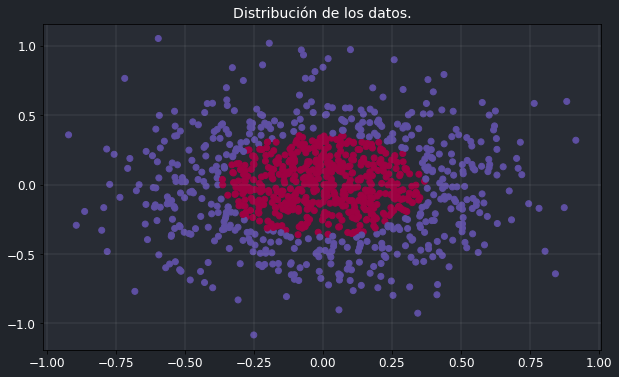

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Distribución de los datos.', size=14, color='white')
plt.grid(visible=True, linewidth=0.1, color='white')

fig.patch.set_facecolor('#21252b') 
ax.set_facecolor('#282c34') 

plt.scatter(X[:,0], X[:,1], c=y[:,0], cmap=plt.cm.Spectral)

plt.xticks(color='white', size=12)
plt.yticks(color='white', size=12)

plt.show()

## **Modelo**

### **Funciones de activación**

In [22]:
def sigmoide(x, derivate=False):
    if derivate:
        return np.exp(-x)/((np.exp(-x)+1)**2)
    else:
        return 1 / (1 + np.exp(-x))

def relu(x, derivate=False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0, x)

### **Función de Perdida**

In [23]:
def mse(y_real, y_pred, derivate=False):
  if derivate==True:
      return (y_pred - y_real)
  else:
    return np.mean((y_pred - y_real)**2)

### **Estructura de la Red Neuronal**

In [9]:
def inicializar_parametros(layers_dim):
  
  parametros = {}
  longitud = len(layers_dim)
  
  for i in range(0, longitud - 1):
    parametros[f'W{str(i + 1)}'] = (np.random.rand(layers_dim[i], layers_dim[i + 1]) * 2) - 1
    parametros[f'b{str(i + 1)}'] = (np.random.rand(1, layers_dim[i + 1]) * 2) - 1
  
  return parametros

#### **Función de entrenamiento**

In [10]:
def train_network(X_data, learning_rate, parametros, training=True):
  # RED NEURONAL
  parametros['A0'] = X_data

  # Capa Oculta 1
  parametros['Z1'] = np.matmul(parametros['A0'], parametros['W1']) + parametros['b1']
  # Función de activación
  parametros['A1'] = relu(parametros['Z1'])

  # Capa Oculta 2
  parametros['Z2'] = np.matmul(parametros['A1'], parametros['W2']) + parametros['b2']
  # Función de activación
  parametros['A2'] = relu(parametros['Z2'])

  # Capa Oculta 3
  parametros['Z3'] = np.matmul(parametros['A2'], parametros['W3']) + parametros['b3']
  # Función de activación
  parametros['A3'] = sigmoide(parametros['Z3'])

  output = parametros['A3']

  if training:
    # BACKPROPAGATION
    parametros['dZ3'] = mse(y, output, derivate=True) * sigmoide(parametros['A3'], True)
    parametros['dw3'] = np.matmul(parametros['A2'].T, parametros['dZ3'])

    parametros['dZ2'] = np.matmul(parametros['dZ3'], parametros['W3'].T) * relu(parametros['A2'], derivate=True)
    parametros['dw2'] = np.matmul(parametros['A1'].T, parametros['dZ2'])

    parametros['dZ1'] = np.matmul(parametros['dZ2'], parametros['W2'].T) * relu(parametros['A1'], derivate=True)
    parametros['dw1'] = np.matmul(parametros['A0'].T, parametros['dZ1'])

    # DESCENSO DEL GRADIENTE
    parametros['W3'] = parametros['W3'] - parametros['dw3'] * learning_rate
    parametros['b3'] = parametros['b3'] - (np.mean(parametros['dw3'], axis=0, keepdims=True)) * learning_rate

    parametros['W2'] = parametros['W2'] - parametros['dw2'] * learning_rate
    parametros['b2'] = parametros['b2'] - (np.mean(parametros['dw2'], axis=0, keepdims=True)) * learning_rate

    parametros['W1'] = parametros['W1'] - parametros['dw1'] * learning_rate
    parametros['b1'] = parametros['b1'] - (np.mean(parametros['dw1'], axis=0, keepdims=True)) * learning_rate
  
  return output

In [24]:
layer_dims = [2, 4, 8, 1]
parametros = inicializar_parametros(layer_dims)
errores = []

for i in range(10000):
  output = train_network(X, 0.001, parametros)
  if i % 50 == 0:
    print(mse(y, output))
    errores.append(mse(y, output))

0.24956431467784881
0.22550486060817418
0.20586168411118344
0.18543376661431854
0.17281727302248803
0.16819552303666052
0.1667327084315984
0.16619381731717278
0.16673908672289192
0.16876379915487147
0.17121281535596614
0.1728875602478331
0.15229597667643566
0.12604361107669393
0.11073975664264879
0.13026732339331457
0.17473473629003672
0.1643952813576257
0.17236200262451948
0.16796558879251625
0.16567843918523678
0.16793149440600097
0.16694848501749823
0.16771318852911485
0.16922823524976888
0.16854033091533205
0.16743091884368613
0.16765428178437186
0.16806161487867236
0.16533722210426563
0.17027870802774175
0.17071332384529656
0.16804857963495515
0.1669756212627018
0.16712235377367216
0.16643921382331017
0.16481941325244362
0.16657154829994256
0.16471381296674253
0.16482297196510934
0.1636875593895073
0.16267208714366455
0.16238146802913941
0.16241302532981933
0.16274694444128582
0.16297475045173326
0.1606535750449699
0.1589041065478533
0.157622724156067
0.16035602464612145
0.1621429